In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Kinjal\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use

In [43]:
aal = pd.read_csv("PEP.csv")
# dis = pd.read_csv("DIS.csv")
# pep = pd.read_csv("PEP.csv")

In [44]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,CMO_252,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252
0,2010-01-04,43.587127,43.822195,43.195349,43.622746,6585900,0.0,0,0.723694,0.747318,...,NaN,0.626846,0.516434,1.183864,0.626846,0.671402,1.539110,0.626846,0.847520,1.942840
1,2010-01-05,43.451787,44.235342,43.380555,44.149864,8886000,0.0,0,1.208357,0.691148,...,4.784259,0.854787,0.511448,1.158437,0.854787,0.676408,1.532073,0.854787,0.848531,1.921933
2,2010-01-06,44.156979,44.498894,43.615611,43.708214,9998000,0.0,0,-1.000344,0.664862,...,5.516727,0.883283,0.510737,1.168514,0.883283,0.676075,1.546792,0.883283,0.846752,1.937284
3,2010-01-07,43.701101,43.722473,43.116995,43.430420,10792000,0.0,0,-0.635564,0.707241,...,5.012792,0.605477,0.532819,1.226833,0.605477,0.675227,1.554732,0.605477,0.843625,1.942476
4,2010-01-08,43.280816,43.323557,42.931779,43.287941,8674700,0.0,0,-0.328063,0.717515,...,5.988949,0.498641,0.538519,1.244039,0.498641,0.670904,1.549863,0.498641,0.842128,1.945409


In [45]:
aal['Hl_pct'] = 100*(aal['High'].shift(1)-aal['Low'].shift(1))/aal['Close'].shift(1)
#aal['pct_change'] = 100*(aal['Close']- aal['Open'])/aal['Open']
aal1=aal.drop(['Open', 'High', 'Low'], axis=1)
aal1

,Date,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,...,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,Hl_pct
0,2010-01-04,43.622746,6585900,0.0,0,0.723694,0.747318,1.035507,1.444018,1.604342,...,0.626846,0.516434,1.183864,0.626846,0.671402,1.539110,0.626846,0.847520,1.942840,NaN
1,2010-01-05,44.149864,8886000,0.0,0,1.208357,0.691148,1.046315,1.445106,0.311568,...,0.854787,0.511448,1.158437,0.854787,0.676408,1.532073,0.854787,0.848531,1.921933,1.436971
2,2010-01-06,43.708214,9998000,0.0,0,-1.000344,0.664862,1.036433,1.446648,0.054552,...,0.883283,0.510737,1.168514,0.883283,0.676075,1.546792,0.883283,0.846752,1.937284,1.936104
3,2010-01-07,43.430420,10792000,0.0,0,-0.635564,0.707241,1.041445,1.432110,0.400120,...,0.605477,0.532819,1.226833,0.605477,0.675227,1.554732,0.605477,0.843625,1.942476,2.020863
4,2010-01-08,43.287941,8674700,0.0,0,-0.328063,0.717515,1.033422,1.430121,0.288173,...,0.498641,0.538519,1.244039,0.498641,0.670904,1.549863,0.498641,0.842128,1.945409,1.394132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2021-07-02,148.910004,3835500,0.0,0,0.479087,0.622969,0.765299,1.008094,0.750008,...,1.580002,1.392999,0.935464,1.580002,1.779917,1.195297,1.580002,2.236027,1.501597,0.769230
2895,2021-07-06,149.130005,4313800,0.0,0,0.147741,0.592917,0.765291,1.007957,-0.202186,...,1.649994,1.425998,0.956211,1.649994,1.778198,1.192381,1.649994,2.236256,1.499535,0.819288
2896,2021-07-07,149.789993,4225000,0.0,0,0.442559,0.598705,0.750852,1.008204,0.335898,...,1.699997,1.474997,0.984710,1.699997,1.756852,1.172877,1.699997,2.233563,1.491129,1.106413
2897,2021-07-08,149.860001,4216000,0.0,0,0.046737,0.289848,0.722829,1.007847,-0.856102,...,1.479996,1.427997,0.952887,1.479996,1.717380,1.145990,1.479996,2.233541,1.490418,1.134920


In [46]:
aal1 = aal.set_index("Date")
aal1.index = pd.to_datetime(aal1.index)

In [47]:
print(len(aal1.columns))
aal1.dropna(inplace=True)
aal1 = aal1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def get_VIF(df, target):
    X = add_constant(df.loc[:, df.columns != target])
    res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
    return res
target = 'Close'
g_all=get_VIF(aal1, target).to_frame()
g_all
g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
g.columns = ['VIF']
g= g[g['VIF']<100]
g.reset_index
c=list(g.index.values)
#aal1=aal1[c]
#c.remove('const')
c.append('Close')
aal1 = aal1[c]
print(len(aal1.columns))
g

73


C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


39


,VIF
Volume,2.017815
Dividends,1.018151
daily_returns,5.752755
std_10,18.594040
std_45,62.277383
market_daily_returns,2.059070
beta,9.323612
residual_volatility,12.661839
ER_10,48.048150
ROC_10,17.586495


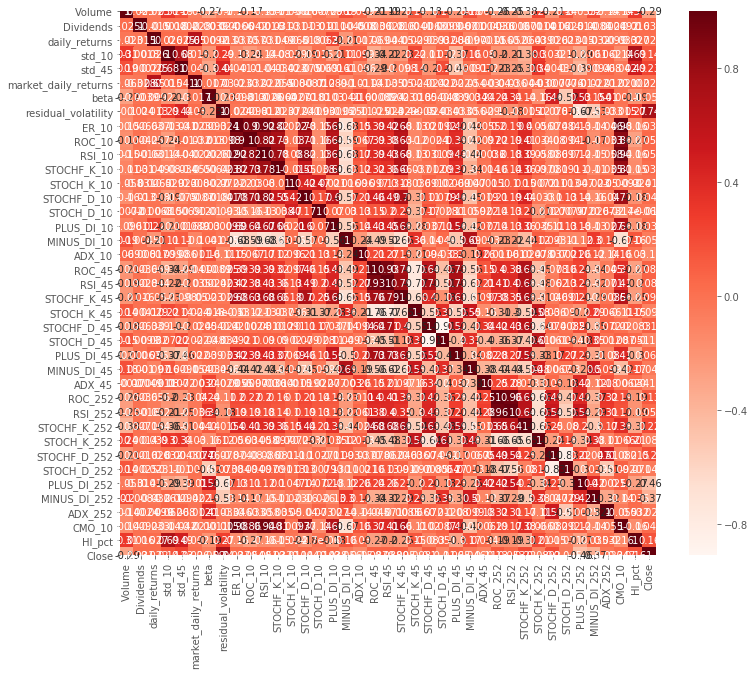

In [48]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [49]:
aal1

,Volume,Dividends,daily_returns,std_10,std_45,market_daily_returns,beta,residual_volatility,ER_10,ROC_10,...,STOCHF_K_252,STOCH_K_252,STOCHF_D_252,STOCH_D_252,PLUS_DI_252,MINUS_DI_252,ADX_252,CMO_10,Hl_pct,Close
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,7897100,0.0,-0.517088,0.576670,0.660959,-0.131306,0.404047,0.464323,-0.039712,-0.003335,...,82.465602,-82.996150,83.648694,-98.950379,23.386089,22.219308,3.911029,-7.746828,0.745244,47.998550
2011-01-05,10381900,0.0,1.803977,0.684193,0.710653,0.500717,0.405448,0.469516,-0.149749,-0.013572,...,79.250415,-109.742203,83.611281,-98.823587,23.607673,22.091167,3.902625,-31.690762,1.635835,48.864433
2011-01-06,7648900,0.0,0.375471,0.682294,0.710592,-0.212296,0.405949,0.467307,0.200333,0.018195,...,90.409303,-108.052193,83.629292,-98.749140,23.562652,22.015167,3.898997,38.264060,1.982279,49.047905
2011-01-07,4899100,0.0,-0.673243,0.733296,0.704081,-0.184478,0.406580,0.467824,0.193339,0.017662,...,92.773757,-85.317886,83.663694,-98.638261,23.464259,21.990415,3.895870,37.663762,0.852782,48.717693
2011-01-10,5220500,0.0,-0.512158,0.741903,0.708665,-0.137633,0.406835,0.468522,0.113639,0.010656,...,88.518222,-80.753968,83.684802,-98.512429,23.371549,22.115427,3.891816,19.887168,0.858563,48.468182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,3835500,0.0,0.479087,0.622969,0.765299,0.750008,0.707109,0.654754,-0.022940,-0.002155,...,95.300133,-142.747464,85.155687,-40.358219,23.214491,20.583449,4.241335,-3.219399,0.769230,148.910004
2021-07-06,4313800,0.0,0.147741,0.592917,0.765291,-0.202186,0.717584,0.655857,0.280999,0.023999,...,98.418744,-141.065284,85.258659,-41.173217,23.120004,20.639856,4.248338,46.225406,0.819288,149.130005
2021-07-07,4225000,0.0,0.442559,0.598705,0.750852,0.335898,0.727946,0.655482,0.201096,0.017536,...,97.207540,-125.638806,85.352807,-41.927689,23.283441,20.582744,4.253978,38.763458,1.106413,149.789993


In [50]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [51]:
aal_df = aal1[rel_feat["sel_col"]]
# aal_df['Date']=aal1['Date']

In [52]:
print(len(aal1.columns), len(rel_feat))

39 7


In [53]:
#aal_df = aal1.copy()

In [54]:
#aal_df=aal_df.drop(['Typical Price'], axis=1)

In [55]:
aal_close_px = aal_df['Close']

In [56]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


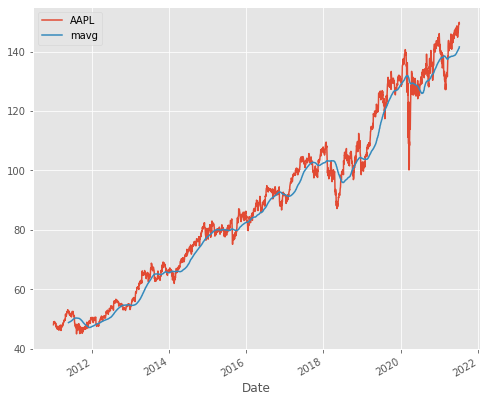

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

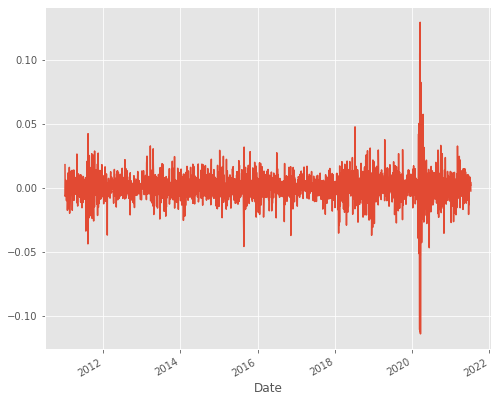

In [58]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [84]:
aal_df['prev_day'] = aal_df['Close'].shift(1)

In [85]:
aal_df = aal_df.iloc[1:]

In [86]:
# aal_df = aal_df.set_index("Date")

In [87]:
# aal_df = aal_df.set_index("Date")
# aal_df.index = pd.to_datetime(aal_df.index)
# aal_df.index[0]

In [88]:
# print(len(aal_df.columns))
# aal_df.fillna(value=-99999, inplace=True)
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# def get_VIF(df, target):
#     X = add_constant(df.loc[:, df.columns != target])
#     res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
#     return res
# target = 'Close'
# g_all=get_VIF(aal_df, target).to_frame()
# g_all
# g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
# g.reset_index
# c=list(g.index.values)
# #aal_df=aal_df[c]
# c.remove('const')
# c.append('Close')
# aal_df = aal_df[c]
# print(len(aal_df.columns))
# g

In [89]:
# g_all

In [90]:
# aal = aal[['Volume', 'std_45', 'PLUS_DI_252', 'std_252', 'prev_day',
#        'residual_volatility', 'MINUS_DI_252',"Close"]]
# aal_df = aal.copy()

In [91]:
# training test split
key = pd.Timestamp(2016, 12, 29)
key2 = pd.Timestamp(2019, 12, 31)

train = aal_df[aal_df.index<=key].copy()
test = aal_df[(aal_df.index<=key2) & (aal_df.index>key)].copy()
col = set(train.columns)
col.remove("Close")
xtrain = train[col]
ytrain = train["Close"]
xtest = test[col]
ytest = test["Close"]

In [92]:
aal_df = aal_df.iloc[1:,:]
#aal_df.drop(['Open', 'High',"Low"], axis=1, inplace = True)
aal_df

,Volume,std_45,residual_volatility,STOCHF_K_252,PLUS_DI_252,MINUS_DI_252,Close,prev_day
Date,,,,,,,,
2011-01-10,5220500,0.708665,0.468522,88.518222,23.371549,22.115427,48.468182,48.717693
2011-01-11,4686400,0.707413,0.454954,85.302691,23.529618,22.054471,48.673645,48.468182
2011-01-12,5265100,0.711998,0.454289,87.950558,23.604903,21.969815,48.967182,48.673645
2011-01-13,7943000,0.711852,0.449732,91.733458,23.732588,21.900661,49.099270,48.967182
2011-01-14,5986100,0.712631,0.451761,93.435711,23.674230,21.888305,49.003868,49.099270
...,...,...,...,...,...,...,...,...
2021-07-02,3835500,0.765299,0.654754,95.300133,23.214491,20.583449,148.910004,148.199997
2021-07-06,4313800,0.765291,0.655857,98.418744,23.120004,20.639856,149.130005,148.910004
2021-07-07,4225000,0.750852,0.655482,97.207540,23.283441,20.582744,149.789993,149.130005


In [93]:
 #!pip install -U statsmodels
#!pip install -U pandas


In [94]:
# # predicting stock prices, feature engineering

# aal_dfreg = aal[['Close', 'Volume']]
# aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
# aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0
# aal_dfreg

In [95]:
# import math
# from sklearn import preprocessing
# # Drop missing value
# aal_df.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(aal_df)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Close'
# aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
# X = np.array(aal_dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(aal_dfreg['label'])
# y = y[:-forecast_out]

In [96]:
# # # model generation
xtrain.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

C:\Users\Kinjal\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [97]:
cols = xtrain.columns
cols

Index(['std_45', 'PLUS_DI_252', 'STOCHF_K_252', 'Volume', 'prev_day',
       'residual_volatility', 'MINUS_DI_252'],
      dtype='object')

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#xtrain = scaler.fit_transform(xtrain)
#xtest = scaler.transform(xtest)

In [99]:
xtrain

,std_45,PLUS_DI_252,STOCHF_K_252,Volume,prev_day,residual_volatility,MINUS_DI_252
Date,,,,,,,
2011-01-07,0.704081,23.464259,92.773757,4899100,49.047905,0.467824,21.990415
2011-01-10,0.708665,23.371549,88.518222,5220500,48.717693,0.468522,22.115427
2011-01-11,0.707413,23.529618,85.302691,4686400,48.468182,0.454954,22.054471
2011-01-12,0.711998,23.604903,87.950558,5265100,48.673645,0.454289,21.969815
2011-01-13,0.711852,23.732588,91.733458,7943000,48.967182,0.449732,21.900661
...,...,...,...,...,...,...,...
2016-12-22,1.030499,22.928792,75.214134,2605000,91.621101,0.600314,22.418732
2016-12-23,1.029674,22.846216,78.677540,1769300,92.189919,0.600682,22.337994
2016-12-27,1.029025,22.799978,77.292103,1505000,91.962379,0.600549,22.270827


In [100]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
from sklearn import linear_model
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(xtrain, ytrain)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(xtrain, ytrain)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(xtrain, ytrain)
clflass = linear_model.Lasso(alpha=0.1)
clflass.fit(xtrain, ytrain)

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.071384e-31
  overwrite_a=True).T
C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.019892e-46
  overwrite_a=True).T


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [102]:
confidencereg = clfreg.score(xtest, ytest)
confidencepoly2 = clfpoly2.score(xtest,ytest)
confidencepoly3 = clfpoly3.score(xtest,ytest)
confidenceknn = clfknn.score(xtest, ytest)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)
clflass.score(xtest, ytest)

The linear regression confidence is  0.9925330462273395
The quadratic regression 2 confidence is  0.9544726785093456
The quadratic regression 3 confidence is  -3.3119282331047466
The knn regression confidence is  -9.527338848725439


0.9929279209715385

In [103]:
forecast_set = clfreg.predict(xtest)
Forecast = pd.DataFrame()
Forecast['Forecast'] = np.nan
Forecast['Date']=aal_df.index
Forecast=Forecast.set_index('Date')

In [104]:
forecast_set
Forecast['Forecast']

Date
2011-01-10   NaN
2011-01-11   NaN
2011-01-12   NaN
2011-01-13   NaN
2011-01-14   NaN
              ..
2021-07-02   NaN
2021-07-06   NaN
2021-07-07   NaN
2021-07-08   NaN
2021-07-09   NaN
Name: Forecast, Length: 2642, dtype: float64

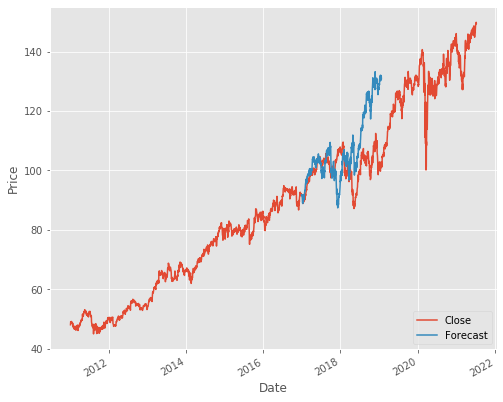

KeyError: 'Forecast'

In [105]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = key
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    Forecast.loc[next_date] = [i]
aal1['Close'].plot()
Forecast['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
aal_df['Forecast']

In [ ]:
print(next_unix)

In [ ]:
print(clfreg.coef_)

In [106]:
print(clfreg.intercept_)

2.0248183732705343


In [107]:
xtrain.columns

Index(['std_45', 'PLUS_DI_252', 'STOCHF_K_252', 'Volume', 'prev_day',
       'residual_volatility', 'MINUS_DI_252'],
      dtype='object')

In [108]:
coeff = dict(zip(cols, clfreg.coef_))


In [109]:

coeff

{'std_45': 0.1429458305101466,
 'PLUS_DI_252': 0.03550857947480546,
 'STOCHF_K_252': -0.00835947245645808,
 'Volume': -1.8970617537409558e-08,
 'prev_day': 1.0031948395313668,
 'residual_volatility': -1.4629989104924912,
 'MINUS_DI_252': -0.07878636269505505}

In [110]:
dict(sorted(coeff.items(), key=lambda item: abs(item[1]), reverse = True))

{'residual_volatility': -1.4629989104924912,
 'prev_day': 1.0031948395313668,
 'std_45': 0.1429458305101466,
 'MINUS_DI_252': -0.07878636269505505,
 'PLUS_DI_252': 0.03550857947480546,
 'STOCHF_K_252': -0.00835947245645808,
 'Volume': -1.8970617537409558e-08}

In [111]:
aal_df

,Volume,std_45,residual_volatility,STOCHF_K_252,PLUS_DI_252,MINUS_DI_252,Close,prev_day
Date,,,,,,,,
2011-01-10,5220500,0.708665,0.468522,88.518222,23.371549,22.115427,48.468182,48.717693
2011-01-11,4686400,0.707413,0.454954,85.302691,23.529618,22.054471,48.673645,48.468182
2011-01-12,5265100,0.711998,0.454289,87.950558,23.604903,21.969815,48.967182,48.673645
2011-01-13,7943000,0.711852,0.449732,91.733458,23.732588,21.900661,49.099270,48.967182
2011-01-14,5986100,0.712631,0.451761,93.435711,23.674230,21.888305,49.003868,49.099270
...,...,...,...,...,...,...,...,...
2021-07-02,3835500,0.765299,0.654754,95.300133,23.214491,20.583449,148.910004,148.199997
2021-07-06,4313800,0.765291,0.655857,98.418744,23.120004,20.639856,149.130005,148.910004
2021-07-07,4225000,0.750852,0.655482,97.207540,23.283441,20.582744,149.789993,149.130005


In [ ]:
xtrain.shape, ytrain.shape

In [ ]:
clfreg = LinearRegression()
clfreg.fit(xtrain, ytrain)

In [ ]:
clfreg.score(xtrain, ytrain)

In [ ]:
clfreg.score(xtest, ytest)

In [ ]:
ytrain